In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import  Image

In [38]:
path = '/Users/sjhuang/Documents/docs/dataset/train/220.248.245.251'

In [39]:
import os
img_paths = []
for i in os.listdir(path):
    if i.endswith('.png') or i.endswith('jpeg') or i.endswith('jpg'):
        img_paths.append(i)


In [ ]:
img = Image.open(os.path.join(path,img_paths[0]))
print(100/32,img.size[0]/img.size[1],img.size)
plt.imshow(img)
plt.show()


In [ ]:
# RGB 通道
data = img.split()
r,g,b = data[0],data[1],data[2]
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(r)
plt.subplot(2, 2, 2)
plt.imshow(g)
plt.subplot(2, 2, 3)
plt.imshow(b)
plt.show()


In [ ]:
bg = None
if img.mode == 'RGBA':
    bg = img.split()[3]
    print(bg.mode)
if bg is not None:
    plt.imshow(bg)
    plt.show()


In [4]:
def to_threshold(lim, threshold  = 10, l = 0, m = 1 ):
    table  =  []
    for  i  in  range( 256 ):
        if  i  < threshold:
            table.append(l)
        else :
            table.append(m)
     #  convert to binary image by the table 
    bim  =  lim.point(table,"1" )
    return bim


In [ ]:
#灰度图片
 #  setup a converting table with constant threshold 

if bg is not None:
    to_threshold(bg,255)

In [ ]:
t = None
if img.mode == 'RGBA':
    t = img.convert('RGB')
    print(t.mode)

t


In [ ]:
background = None
if img.mode == 'RGBA':
    png = Image.open(os.path.join(path,img_paths[0]))
    png.load() # required for png.split()

    background = Image.new("RGB", png.size, (255, 255, 255))
    background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background

In [ ]:
#灰度图片
 #  setup a converting table with constant threshold 
if background is not None:
    lim  =  background.convert("L")
else:
    lim = img.convert('L')
plt.imshow(lim)
plt.show()

In [ ]:

imgs = [r,g,b,lim]
thresholds = [115,140,120,130]
for img,threshold in zip(imgs,thresholds):
    to_threshold(img,threshold = threshold)

In [32]:
def handle_img(img_path, threshold = 200,thresholds = [115,140,120,130], show = False):
    img = Image.open(os.path.join(path,img_path))
    # print(100/32,img.size[0]/img.size[1],img.size,img_path, img.mode)
    ans = [img]
    titles = ['img']
    if img.mode == 'RGBA':
        r,g,b,a = img.split()
        a_s = to_threshold(a,threshold,1,0)
        img.load() # required for png.split()
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=a) # 3 is the alpha channel
        lim  =  background.convert("L")
        ans.extend([r,g,b,a,a_s,background,lim])
        titles.extend(['r','g','b','a','a_s','bg','lim'])
    else:
        lim = img.convert('L')
        r,g,b = img.split()
        ans.extend([r,g,b,lim])
        titles.extend(['r','g','b','lim'])
    imgs = [r,g,b,lim]
    imgs_t = ['r_t','g_t','b_t','lim_t']
    titles.extend(imgs_t)
    for img_,threshold_ in zip(imgs,thresholds):
        # print(img_.mode)
        ans.append(to_threshold(img_,threshold = threshold_))
    if show:
        fig, ax = plt.subplots(3, 5,figsize = (21,7)) 
        for idx,i in enumerate(ans):
            x = int(idx/5)
            y = int(idx - x*5)
            ax[x,y].set_title(titles[idx])
            ax[x,y].imshow(i)
        plt.show()
    return ans,img_path

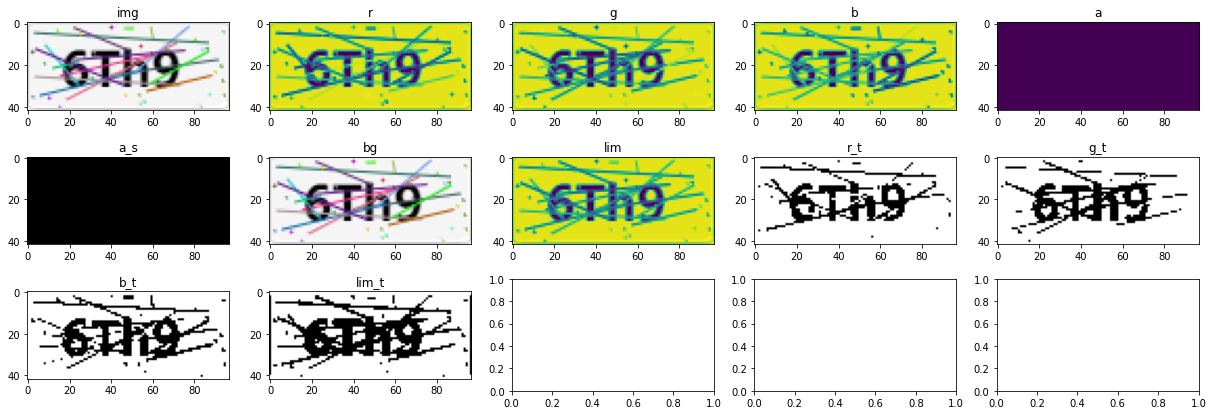

In [40]:
threshold = 255
thresholds = [150,160,180,200]
idx = 0
res,img_path = handle_img(img_paths[idx], threshold, thresholds,show = True)

In [ ]:
ori,handled = res[4],res[8]
print(ori.mode, handled.mode)
ori_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/ori/{img_path}'
handled_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/handle/{img_path}'
ori.save(ori_path)
handled.save(handled_path)

In [41]:
from tqdm import tqdm
for idx,img_path in tqdm(enumerate(img_paths)):
    threshold = 255
    thresholds = [120,130,140,160]
    res,img_path = handle_img(img_paths[idx], threshold, thresholds)
    ori,handled = res[7],res[8]
    # print(ori.mode, handled.mode)
    ori_path = f'/Users/sjhuang/Documents/docs/dataset/fine_tune/{img_path}'
    ori.save(ori_path)
    # handled_path = f'/Users/sjhuang/Documents/docs/dataset/unlabel_data/unlabel_data/220.248.245.251_binary/{img_path}'
    # handled.save(handled_path)
   

6726it [00:13, 495.30it/s]
